In [1]:
#!pip install -r requirements.txt

In [2]:
#!python -m pip install -U scikit-image

In [3]:
%run ./src/main.py --mode=jupyter

variabili e librerie caricate


In [4]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
])

try:
    datamodule = Mitbih_datamodule(
        datasetFolder=r"/workspace/Desktop/Progetto_DataMining/Dataset/mitbih_database", 
        batch_size=150, 
        num_workers=5,
        pin_memory=True,
        persistent_workers=True,
        prefetch_factor=2,
        training_transform_pipe = train_transforms,
        validation_transform_pipe = None,
        random_seed=92,
        use_smote_on_validation=True,
        splitMode=SplitMode.RANDOM
    )
except:
    datamodule = Mitbih_datamodule(
        datasetFolder=r"/workspace/Desktop/GIT_HUB/Progetto_DataMining/Dataset/mitbih_database", 
        batch_size=150, 
        num_workers=5,
        pin_memory=True,
        persistent_workers=True,
        prefetch_factor=2,
        training_transform_pipe = train_transforms,
        validation_transform_pipe = None,
        random_seed=92,
        use_smote_on_validation=True,
        splitMode=SplitMode.RANDOM
    )
    

[2025-09-11 13:34:27] [INFO] Verifica esitenza directory dataset...
[2025-09-11 13:34:27] [INFO] Directory trovata: /workspace/Desktop/GIT_HUB/Progetto_DataMining/Dataset/mitbih_database
[2025-09-11 13:34:27] [INFO] Verifica dei files...
[2025-09-11 13:34:27] [INFO] Tutti i file trovati
[2025-09-11 13:34:27] [INFO] ----------------------------------------------------------------------------------------------------
[2025-09-11 13:34:27] [INFO] caricamneto dei dati 
PAC - record 232: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
[2025-09-11 13:34:30] [INFO] ----------------------------------------------------------------------------------------------------
[2025-09-11 13:34:30] [INFO] Realizzazione delle finestre...
PAC - record 232: 100%|██████████| 5/5 [00:00<00:00, 44.32it/s]
[2025-09-11 13:34:30] [INFO] ----------------------------------------------------------------------------------------------------
[2025-09-11 13:34:30] [INFO] Divisione dei dati in training e validation
[2025-09-

In [5]:
index = 1

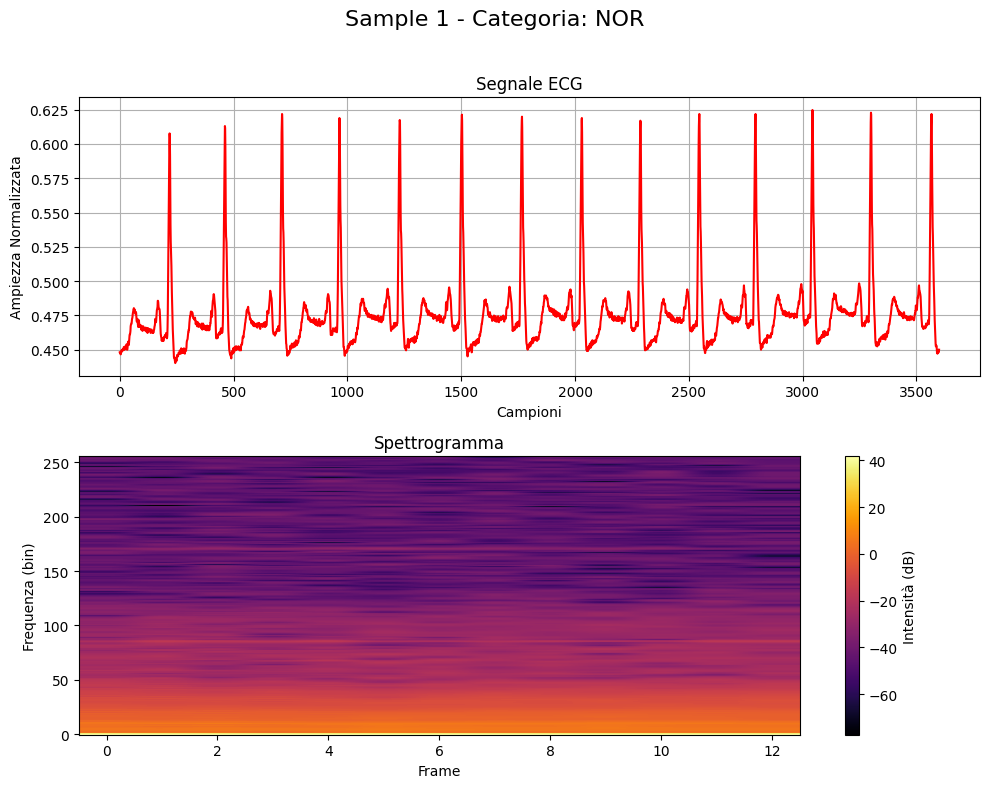

In [6]:
datamodule.get_test_dataset().show_sample_spectrogram(index)

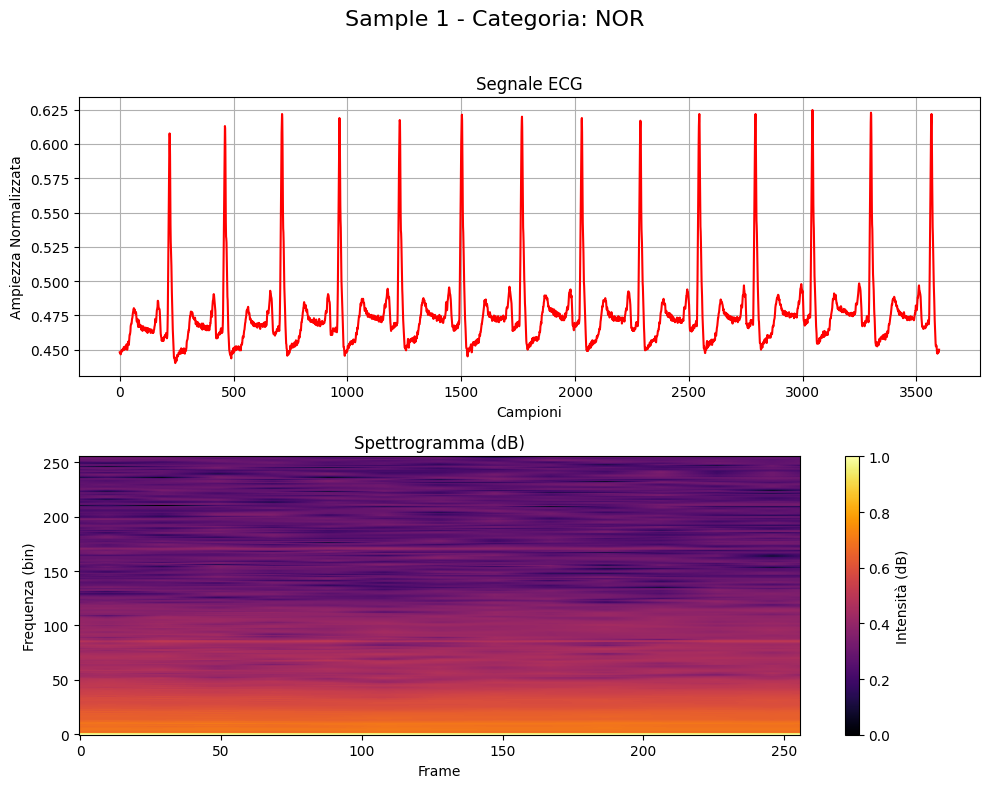

In [7]:
datamodule.get_test_dataset().show_sample_spectrogram_norm(index)

In [8]:
datamodule.get_test_dataset()[400]

{'x1': tensor([0.5032, 0.5037, 0.5037,  ..., 0.5071, 0.5066, 0.5110]),
 'x2': tensor([[[0.9938, 0.9938, 0.9939,  ..., 0.9965, 0.9965, 0.9966],
          [0.9403, 0.9404, 0.9404,  ..., 0.9429, 0.9429, 0.9429],
          [0.4693, 0.4771, 0.4849,  ..., 0.5131, 0.5126, 0.5120],
          ...,
          [0.2062, 0.2088, 0.2114,  ..., 0.1941, 0.1952, 0.1964],
          [0.1743, 0.1738, 0.1733,  ..., 0.2321, 0.2313, 0.2306],
          [0.2008, 0.2064, 0.2119,  ..., 0.2470, 0.2440, 0.2410]]]),
 'x3': tensor([[[ 42.1988,  42.0856,  42.1737,  ...,  42.5928,  42.5051,  42.4221],
          [ 36.2185,  36.0750,  36.1835,  ...,  36.5876,  36.4930,  36.4016],
          [ -8.5359, -25.6958,  -6.4782,  ..., -11.8235, -12.5590, -11.2943],
          ...,
          [-43.4583, -49.2199, -40.3290,  ..., -35.5925, -45.9700, -48.4985],
          [-50.2925, -49.1951, -43.6012,  ..., -43.1040, -44.3127, -42.6857],
          [-40.9803, -53.2456, -43.9362,  ..., -39.2930, -45.8281, -39.1073]]]),
 'y': tensor(2),


In [9]:
datamodule.get_train_dataset()[2]

{'x1': tensor([0.5037, 0.5027, 0.5037,  ..., 0.5183, 0.5188, 0.5198]),
 'x2': tensor([[[0.9973, 0.9972, 0.9972,  ..., 0.9999, 0.9999, 0.9999],
          [0.9448, 0.9447, 0.9447,  ..., 0.9484, 0.9484, 0.9484],
          [0.6366, 0.6374, 0.6381,  ..., 0.6401, 0.6401, 0.6400],
          ...,
          [0.2687, 0.2680, 0.2672,  ..., 0.2316, 0.2299, 0.2281],
          [0.2818, 0.2818, 0.2819,  ..., 0.2602, 0.2552, 0.2502],
          [0.2510, 0.2481, 0.2452,  ..., 0.3198, 0.3185, 0.3173]]]),
 'x3': tensor([[[ 42.1042,  42.1364,  42.2020,  ...,  42.3936,  42.4353,  42.4154],
          [ 36.0518,  36.1028,  36.2082,  ...,  36.4135,  36.4985,  36.4845],
          [  1.4258,  -0.3249,   1.3492,  ...,  -0.7698,   0.9556,   1.0230],
          ...,
          [-42.6003, -40.8239, -41.4347,  ..., -39.1334, -48.4759, -44.5839],
          [-40.2234, -40.2888, -41.6568,  ..., -39.6332, -49.8277, -38.5237],
          [-46.9096, -40.3579, -41.8863,  ..., -35.3099, -37.6995, -34.7902]]]),
 'y': tensor(0),


In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Supponiamo di avere già il segmento da 10s a 360 Hz (3600 campioni)
fs = 360
t = torch.linspace(0, 10, fs*10)  # 10 secondi
signal = torch.sin(2*np.pi*5*t) + 0.5*torch.sin(2*np.pi*50*t)

print(t)
print(signal)
print()
print(t.shape)
print(signal.shape)

tensor([0.0000e+00, 2.7785e-03, 5.5571e-03,  ..., 9.9944e+00, 9.9972e+00,
        1.0000e+01])
tensor([ 0.0000e+00,  4.7028e-01,  6.6606e-01,  ..., -6.6607e-01,
        -4.7030e-01,  6.5805e-05])

torch.Size([3600])
torch.Size([3600])


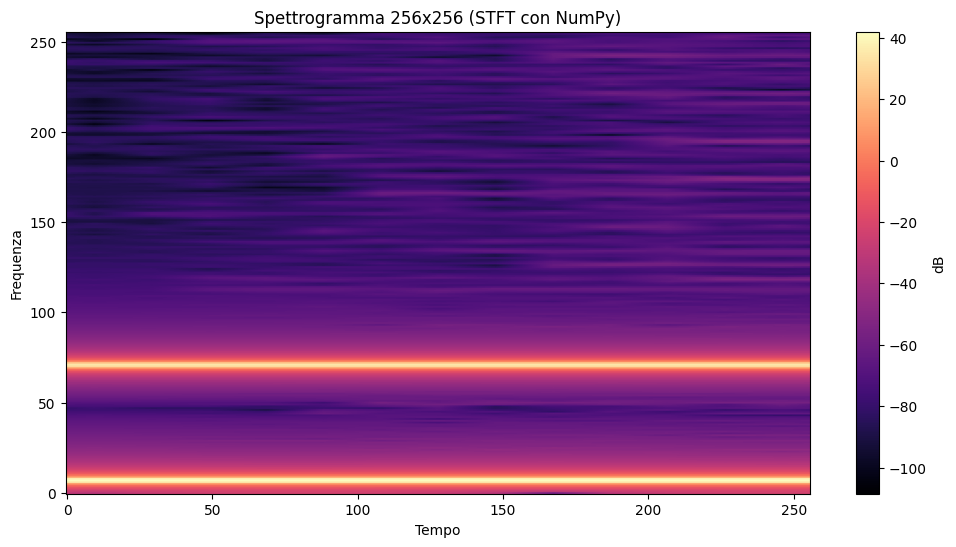

In [11]:
# Converti in numpy
signal_np = signal.numpy()

# Parametri STFT
win_size = 512
hop_size = 256
window = np.hanning(win_size)

# Calcolo manuale STFT
num_frames = 1 + (len(signal_np) - win_size) // hop_size
stft_matrix = np.zeros((win_size // 2 + 1, num_frames), dtype=np.complex64)

for i in range(num_frames):
    start = i * hop_size
    end = start + win_size
    frame = signal_np[start:end] * window
    spectrum = np.fft.rfft(frame) 
    stft_matrix[:, i] = spectrum

# Magnitudo dello spettrogramma
spectrogram = (np.abs(stft_matrix) + 1e-8 )**2

# Conversione in dB
spectrogram_db = 10 * np.log10(spectrogram)

# Resize a 256x256
spectrogram_resized = resize(spectrogram_db, (256, 256), mode='reflect', anti_aliasing=True)

# Visualizza risultato
plt.figure(figsize=(12, 6))
plt.imshow(spectrogram_resized, aspect='auto', cmap='magma', origin='lower')
plt.title("Spettrogramma 256x256 (STFT con NumPy)")
plt.xlabel("Tempo")
plt.ylabel("Frequenza")
plt.colorbar(label="dB")
plt.show()


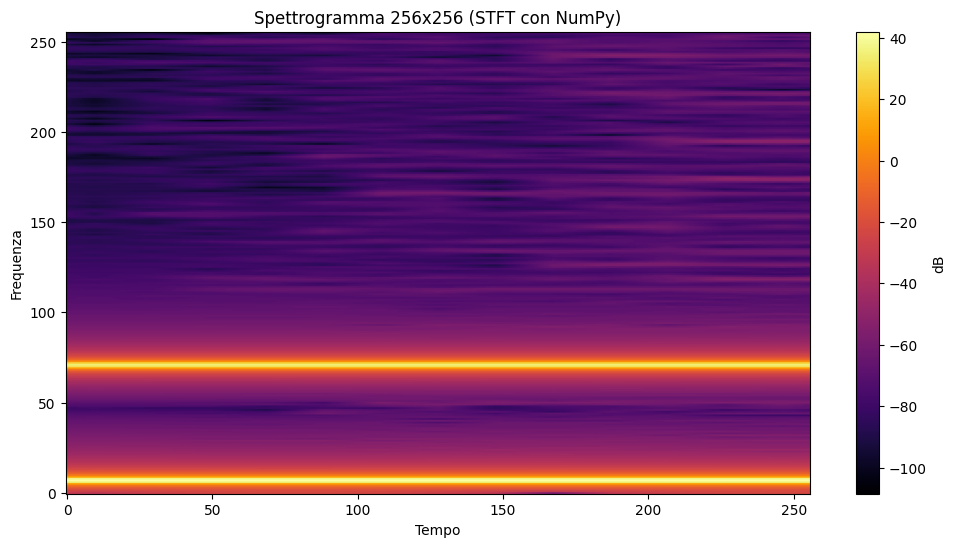

In [12]:
# Converti in numpy
signal_np = signal.numpy()

# Parametri STFT
win_size = 512
hop_size = 256
window = np.hanning(win_size)

# Calcolo manuale STFT
num_frames = 1 + (len(signal_np) - win_size) // hop_size
stft_matrix = np.zeros((win_size // 2 + 1, num_frames), dtype=np.complex64)

for i in range(num_frames):
    start = i * hop_size
    end = start + win_size
    frame = signal_np[start:end] * window
    spectrum = np.fft.rfft(frame) 
    stft_matrix[:, i] = spectrum

# Magnitudo dello spettrogramma
spectrogram = np.abs(stft_matrix)

# Conversione in dB
spectrogram_db = 20 * np.log10(spectrogram + 1e-8)

# Resize a 256x256
spectrogram_resized = resize(spectrogram_db, (256, 256), mode='reflect', anti_aliasing=True)

# Visualizza risultato
plt.figure(figsize=(12, 6))
plt.imshow(spectrogram_resized, aspect='auto', cmap='inferno', origin='lower')
plt.title("Spettrogramma 256x256 (STFT con NumPy)")
plt.xlabel("Tempo")
plt.ylabel("Frequenza")
plt.colorbar(label="dB")
plt.show()


# `skimage.transform.resize`

La funzione `resize` ridimensiona un'immagine (array NumPy) a una forma specificata.

---

## Parametri principali

- **`image`**  
  L’immagine di input (array NumPy). Può essere:
  - 2D → immagine in scala di grigi `(h, w)`
  - 3D → immagine RGB `(h, w, c)`

- **`output_shape`**  
  La forma desiderata dell’output, ad esempio:
  - `(100, 100)` per immagine in bianco e nero
  - `(200, 200, 3)` per immagine RGB

- **`order`** *(default: 1)*  
  Tipo di interpolazione:
  - `0` → nearest-neighbor  
  - `1` → bilineare  
  - `2` → bi-quadratica  
  - `3` → bi-cubica  
  - `4+` → spline di ordine superiore  

- **`mode`** *(default: 'reflect')*  
  Come gestire i pixel fuori dai bordi:
  - `'reflect'` → riflette i pixel  
  - `'constant'` → usa `cval`  
  - `'edge'` → estende i bordi  
  - `'wrap'` → avvolge l’immagine  

- **`cval`** *(default: 0)*  
  Valore costante usato se `mode='constant'`.

- **`clip`** *(default: True)*  
  Se `True`, i valori vengono limitati all’intervallo valido `[0, 1]`  
  (se `preserve_range=False`).

- **`preserve_range`** *(default: False)*  
  - `False` → i valori vengono normalizzati in `[0, 1]` prima del ridimensionamento.  
  - `True` → mantiene i valori originali (utile per immagini intere o dati scientifici).

- **`anti_aliasing`** *(default: None)*  
  - `True` → applica un filtro anti-aliasing (utile quando si riduce la dimensione).  
  - `False` → nessun filtro.  
  - `None` → decide automaticamente in base al ridimensionamento.

- **`anti_aliasing_sigma`**  
  Controlla la forza del filtro anti-aliasing (se attivo).  


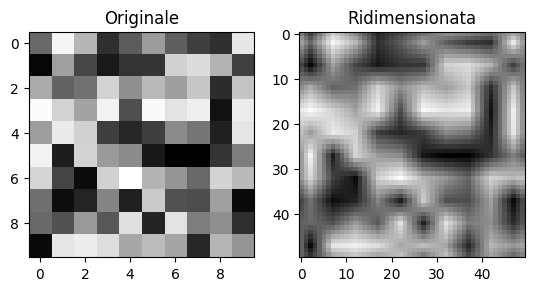

In [13]:
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt

# immagine 10x10 casuale
image = np.random.rand(10, 10)

# ridimensiono a 50x50
resized = resize(image, (50, 50), anti_aliasing=True)

plt.subplot(1, 2, 1)
plt.title("Originale")
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Ridimensionata")
plt.imshow(resized, cmap="gray")
plt.show()


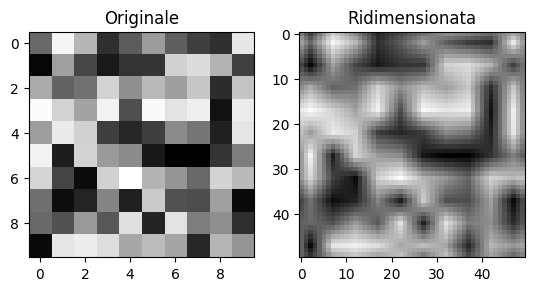

In [14]:
resized = resize(image, (50, 50), anti_aliasing=False)

plt.subplot(1, 2, 1)
plt.title("Originale")
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Ridimensionata")
plt.imshow(resized, cmap="gray")
plt.show()

L’anti-aliasing applica un filtro passa-basso (tipicamente una sfocatura gaussiana) prima del ridimensionamento, in modo da eliminare le frequenze troppo alte (i dettagli troppo fini) che non potrebbero essere rappresentati correttamente nella nuova immagine.

In [15]:
#checkpoint_path = r"/workspace/Desktop/Progetto_DataMining/SIGNALS/Data/Models/mode_random/seed_48/ResNet18/checkpoints/checkpoint_epoch_73_val_loss_0.0013.pt"
checkpoint_path = r"/workspace/Desktop/GIT_HUB/Progetto_DataMining/SIGNALS/Data/Models/mode_random/seed_48/ResNet18/checkpoints/checkpoint_epoch_73_val_loss_0.0013.pt"

#/workspace/Desktop/GIT_HUB/Progetto_DataMining/Dataset/mitbih_database



In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNet18()

checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(state_dict=checkpoint['model_state_dict'], strict=True)

<All keys matched successfully>

In [17]:
model.to(device)
model.eval()
idx = 600

with torch.no_grad():
    data = datamodule.get_test_dataset()[idx]
    x = data['x2'].unsqueeze(0)
    y = data['y']

    out = torch.nn.functional.softmax(model(x), dim=1)
    preds = torch.argmax(out, dim=1) 

    print(f"y true: {y} Pred: {preds}")


y true: 3 Pred: tensor([3])


In [19]:
print(x.shape)
print(out.shape, out)
print(preds)

torch.Size([1, 1, 256, 256])
torch.Size([1, 5]) tensor([[3.5900e-04, 1.1940e-03, 9.7597e-04, 9.9746e-01, 1.0684e-05]])
tensor([3])
